In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from Crypto.Cipher import DES
from Crypto.Cipher import ARC4
import hashlib

In [14]:
def ms_chap_derive_key(username, password, challenge, key_length):
    data = username.encode('utf-8') + password.encode('utf-8') + challenge

    derived_key = b""

    while len(derived_key) < key_length:
        hash_value = hashlib.new('md5', data).digest()

        derived_key += hash_value

        data = hash_value

    derived_key = derived_key[:key_length]

    return derived_key

In [25]:
username = "user123"
password = "password123"
challenge = b"challenge123"
key_lengths = [5, 7, 16]
times = []

for key_length in key_lengths:
    avg_time = 0
    for i in range(50000):
        start = time.time()
        key = ms_chap_derive_key(username, password, challenge, key_length)
        end = time.time()
        avg_time += (end - start) / 50000
    times.append(avg_time)

print(times)

[1.6200017929079938e-06, 1.6544532775882852e-06, 1.569967269897634e-06]


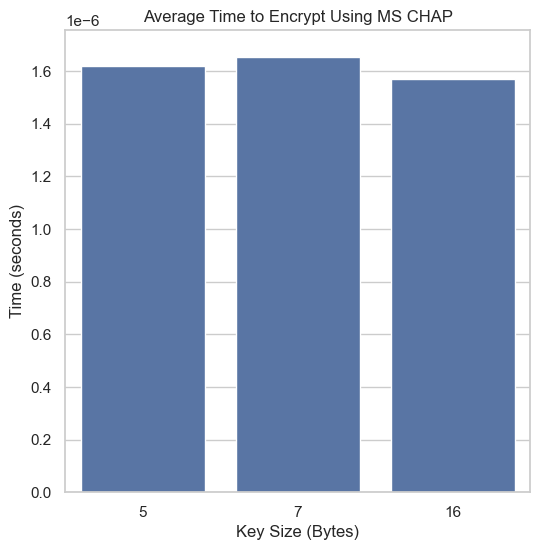

In [37]:
import numpy as np
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    return f"{np.exp(value):.7f} ms"

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x=key_lengths, y=times, dodge=True)

plt.title('Average Time to Encrypt Using MS CHAP')
plt.xlabel('Key Size (Bytes)')
plt.ylabel('Time (seconds)')
plt.ylim(0, max(times)+.0000001)

plt.show()